## Preprocessing

In [9]:
import pandas as pd

teams = pd.read_csv('data/MTeams.csv')

url = f"https://www.sports-reference.com/cbb/seasons/men/{2023}-ratings.html"
df = pd.read_html(url)[0]
df.columns = df.columns.droplevel()
df = df.dropna(axis=1,how='all')
df = df[df['Rk'].notna()]
df = df.drop_duplicates(keep=False)



In [2]:
cref_names = [
    'Abilene Christian',
    'Alabama State',
    'Albany (NY)',
    'Alcorn State',
    'unknown',
    'American',
    'Appalachian State',
    'Arizona State',
    'Little Rock',     
    'Arkansas-Pine Bluff',
    'Arkansas State',
    'Armstrong State',
    'unknown',
    'Ball State',
    'unknown',
    'Boise State',
    'Boston University',
    'Bowling Green State',
    'unknown',
    'Brigham Young',
    'Central Michigan',
    'Central Arkansas',
    'unknown',
    'Central Connecticut State',
    'Charleston Southern',
    'Chicago State',
    'The Citadel',
    'Cleveland State',
    'Coastal Carolina',
    'College of Charleston',
    'Colorado State',
    'Coppin State',
    'Cal State Bakersfield',
    'Cal State Fullerton',
    'Cal State Northridge',
    'Cal State Sacramento',
    'Delaware State',
    'Detroit Mercy',
    'Eastern Illinois',
    'Eastern Kentucky',
    'Eastern Michigan',
    'Eastern Washington',
    'Southern Illinois',
    'East Tennessee State',
    'Fairleigh Dickinson',
    'Florida Atlantic',
    'Florida Gulf Coast',
    'Florida International',
    'Florida State',
    'Fresno State',
    'George Washington',
    'Georgia Southern',
    'Gardner-Webb',
    'Georgia State',
    'unknown',
    'Houston Christian',
    'Idaho State',
    'Illinois-Chicago',
    'Illinois State',
    'Indiana State',
    'Iowa State',
    'Purdue-Fort Wayne',
    'Jackson State',
    'Jacksonville State',
    'Kansas State',
    'Kennesaw State',
    'Kent State',
    'Long Beach State',
    'Long Island University',
    'Loyola Marymount',
    'Loyola (MD)',
    'Loyola (IL)',
    'Louisiana State',
    'Massachusetts-Lowell',
    'McNeese State',
    'Maryland-Eastern Shore',
    'Miami (FL)',
    'Miami (OH)',
    'Michigan State',
    'Mississippi State',
    'Missouri',
    'Missouri State',
    'Monmouth',
    'Montana State',
    'Morehead State',
    'Morgan State',
    'unknown',
    'Mississippi Valley State',
    'Mount St. Mary\'s',
    'Middle Tennessee',
    'Murray State',
    'Northern Colorado',
    'North Dakota State',
    'Northern Illinois',
    'Northern Kentucky',
    'North Carolina A&T',
    'North Carolina Central',
    'Illinois',
    'Omaha',
    'New Mexico State',
    'Nicholls State',
    'Norfolk State',
    'Northwestern',
    'Ohio State',
    'Oklahoma',
    'Oklahoma State',
    'Oregon State',
    'Pennsylvania',
    'Penn State',
    'Portland State',
    'South Carolina State',
    'South Dakota State',
    'Southern Illinois',
    'Sam Houston State',
    'San Diego State',
    'San Jose State',
    'Savannah State',
    'South Carolina Upstate',
    'Southeastern Louisiana',
    'Southeastern Missouri State',
    'Stephen F. Austin',
    'Southern Methodist',
    'Southern Mississippi',
    'Southern',
    'St. Bonaventure',
    'St. Francis (NY)',
    'Saint Francis (PA)',
    'St. John\'s (NY)',
    'Saint Joseph\'s',
    'Saint Louis',
    'Saint Mary\'s (CA)',
    'Saint Peter\'s',
    'Texas A&M-Corpus Christi',
    'Tennessee State',
    'Texas State',
    'Tennessee-Martin',
    'Texas-Rio Grande Valley',
    'Texas Southern',
    'Central Florida',
    'Louisiana-Monroe',
    'Maryland-Baltimore County',
    'Nevada-Las Vegas',
    'Southern California',
    'UTSA',
    'Utah State',
    'unknown',
    'Virginia Commonwealth',
    'Western Carolina',
    'Western Illinois',
    'Western Kentucky',
    'Western Michigan',
    'unknown',
    'unknown',
    'Washington State',
    'Weber State',
    'Green Bay',
    'Milwaukee',
    'Wichita State',
    'Wright State',
    'Youngstown State',
    'California Baptist',
    'Tarleton State',
    'St. Thomas',
    'Queens (NC)',
    'Texas A&M-Commerce'
]

cref_namelist = []
i = 0
for name in teams['TeamName'].to_list():
    if name in df['School'].to_list():
        cref_namelist.append(name)
    else:
        cref_namelist.append(cref_names[i])
        i = i+1

teams['crefName'] = cref_namelist
teams = teams[teams['LastD1Season']==2023]
teams.to_csv('data/mens_teams.csv', index=False)

In [3]:
import zipfile
with zipfile.ZipFile('data/WRegularSeasonCompactResults.csv.zip', 'r') as zip_ref:
    zip_ref.extractall('data/')

In [4]:
# Find the current Wteam ids (they play in the 2023 season)
df = pd.read_csv('data/WRegularSeasonCompactResults.csv')
df = df[df['Season']==2023]
cur_wteam_ids = list(set(df['WTeamID'].to_list() + df['LTeamID'].to_list()))

In [5]:
import pandas as pd

teams = pd.read_csv('data/WTeams.csv')

url = f"https://www.sports-reference.com/cbb/seasons/women/{2023}-ratings.html"
df = pd.read_html(url)[0]
df.columns = df.columns.droplevel()
df = df.dropna(axis=1,how='all')
df = df[df['Rk'].notna()]
df = df.drop_duplicates(keep=False)

In [6]:
wcref_names = cref_names[:26] + cref_names[27:]

wcref_namelist = []
i = 0
for name in teams['TeamName'].to_list():
    if name in df['School'].to_list():
        wcref_namelist.append(name)
    else:
        wcref_namelist.append(wcref_names[i])
        i = i+1

teams['crefName'] = wcref_namelist
i = teams[~teams['TeamID'].isin(cur_wteam_ids)].index
teams = teams.drop(i)
teams.to_csv('data/women_teams.csv', index=False)

## Men

In [10]:
# 538 ratings

import pandas as pd
from tqdm import tqdm

# Create test set (NCAA games)
ratings538_df = pd.read_csv('data/538ratingsMen.csv')
df_list = []
teams = pd.read_csv('data/mens_teams.csv')
seasons = [2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022]
for season in tqdm(seasons):
    url = f"https://www.sports-reference.com/cbb/seasons/men/{season}-ratings.html"
    df = pd.read_html(url)[0]
    df.columns = df.columns.droplevel()
    df = df.dropna(axis=1,how='all')
    df = df[df['Rk'].notna()]
    df = df.drop_duplicates(keep=False)
    df['season'] = season
    df = df.merge(teams, left_on='School', right_on='crefName', how='inner')
    df = df.merge(ratings538_df, left_on=['season', 'TeamID'], right_on=['Season', 'TeamID'], how='inner')
    df_list.append(df)

season_data = pd.concat(df_list)
season_data.to_csv('data/mens_season_stats.csv', index=False)

tourney_info = pd.read_csv('data/MNCAATourneyCompactResults.csv')

test_data = pd.merge(season_data, tourney_info, left_on=['season', 'TeamID'], right_on=['Season', 'WTeamID'], how='inner').merge(season_data, left_on=['LTeamID', 'season'], right_on=['TeamID', 'season'], how='inner', suffixes=('_1', '_2'))
test_data['Score_dif'] = test_data['WScore'] - test_data['LScore']
test_data = test_data.drop(['Season_x', 'Season_y', 'TeamName_y_1', 'TeamName_y_2', 'crefName_1', 'crefName_2', 'WLoc', 'WScore', 'LScore', 'TeamName_x_1', 'TeamName_x_2', 'WTeamID', 'LTeamID', 'TeamID_1', 'TeamID_2', 'Rk_1', 'Rk_2', 'School_1', 'DayNum', 'NumOT', 'School_2', 'Conf_1', 'Conf_2', 'FirstD1Season_1', 'FirstD1Season_2', 'LastD1Season_1', 'LastD1Season_2', 'ORtg_1', 'ORtg_2', 'DRtg_1', 'DRtg_2', 'OSRS_1', 'OSRS_2', 'DSRS_1', 'DSRS_2', 'Season'], axis=1)

100%|██████████| 12/12 [00:03<00:00,  3.55it/s]


In [80]:
# Adv Team Stats

import pandas as pd
from tqdm import tqdm

url = f"https://www.sports-reference.com/cbb/seasons/men/{2023}-advanced-school-stats.html"
men_adv_stats_df = pd.read_html(url)[0]
men_adv_stats_df.columns = men_adv_stats_df.columns.droplevel()
men_adv_stats_df = men_adv_stats_df.dropna(axis=1,how='all')
men_adv_stats_df = men_adv_stats_df[men_adv_stats_df['Rk'].notna()]
men_adv_stats_df = men_adv_stats_df.drop_duplicates(keep=False)
men_adv_stats_df = men_adv_stats_df[['School', 'W-L%', 'Pace', 'FTr', '3PAr', 'TS%', 'TRB%',
       'AST%', 'STL%', 'BLK%', 'eFG%', 'TOV%', 'ORB%', 'FT/FGA']]

# Create test set (NCAA games)
df_list = []
teams = pd.read_csv('data/mens_teams.csv')
seasons = [2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022]
for season in tqdm(seasons):
    url = f"https://www.sports-reference.com/cbb/seasons/men/{season}-ratings.html"
    df = pd.read_html(url)[0]
    df.columns = df.columns.droplevel()
    df = df.dropna(axis=1,how='all')
    df = df[df['Rk'].notna()]
    df = df.drop_duplicates(keep=False)
    df['season'] = season
    df = df.merge(teams, left_on='School', right_on='crefName', how='inner')
    df = df.merge(men_adv_stats_df, on='School', how='inner')
    df_list.append(df)

season_data = pd.concat(df_list)
season_data.to_csv('data/mens_season_stats.csv', index=False)

tourney_info = pd.read_csv('data/MNCAATourneyCompactResults.csv')

test_data = pd.merge(season_data, tourney_info, left_on=['season', 'TeamID'], right_on=['Season', 'WTeamID'], how='inner').merge(season_data, left_on=['LTeamID', 'season'], right_on=['TeamID', 'season'], how='inner', suffixes=('_1', '_2'))
test_data['Score_dif'] = test_data['WScore'] - test_data['LScore']
test_data = test_data.drop(['crefName_1', 'crefName_2', 'WLoc', 'WScore', 'LScore', 'TeamName_1', 'TeamName_2', 'WTeamID', 'LTeamID', 'TeamID_1', 'TeamID_2', 'Rk_1', 'Rk_2', 'School_1', 'DayNum', 'NumOT', 'School_2', 'Conf_1', 'Conf_2', 'FirstD1Season_1', 'FirstD1Season_2', 'LastD1Season_1', 'LastD1Season_2', 'ORtg_1', 'ORtg_2', 'DRtg_1', 'DRtg_2', 'OSRS_1', 'OSRS_2', 'DSRS_1', 'DSRS_2', 'Season'], axis=1)

100%|██████████| 12/12 [00:03<00:00,  3.08it/s]


In [11]:
test_data.keys()

Index(['W_1', 'L_1', 'Pts_1', 'Opp_1', 'MOV_1', 'SOS_1', 'SRS_1', 'NRtg_1',
       'season', '538rating_1', 'W_2', 'L_2', 'Pts_2', 'Opp_2', 'MOV_2',
       'SOS_2', 'SRS_2', 'NRtg_2', '538rating_2', 'Score_dif'],
      dtype='object')

In [12]:
# Give me the reverse
test_data_rev = pd.DataFrame()
test_data_rev.insert(0, 'W_1', test_data['W_2'], True)
test_data_rev.insert(1, 'L_1', test_data['L_2'], True)
test_data_rev.insert(2, 'Pts_1', test_data['Pts_2'], True)
test_data_rev.insert(3, 'Opp_1', test_data['Opp_2'], True)
test_data_rev.insert(4, 'MOV_1', test_data['MOV_2'], True)
test_data_rev.insert(5, 'SOS_1', test_data['SOS_2'], True)
test_data_rev.insert(6, 'SRS_1', test_data['SRS_2'], True)
test_data_rev.insert(7, 'NRtg_1', test_data['NRtg_2'], True)
test_data_rev.insert(8, 'season', test_data['season'], True)
test_data_rev.insert(9, '538rating_1', test_data['538rating_2'], True)
'''
test_data_rev.insert(9, 'W-L%_1', test_data['W-L%_2'], True)
test_data_rev.insert(10, 'Pace_1', test_data['Pace_2'], True)
test_data_rev.insert(11, 'FTr_1', test_data['FTr_2'], True)
test_data_rev.insert(12, '3PAr_1', test_data['3PAr_2'], True)
test_data_rev.insert(13, 'TS%_1', test_data['TS%_2'], True)
test_data_rev.insert(14, 'TRB%_1', test_data['TRB%_2'], True)
test_data_rev.insert(15, 'AST%_1', test_data['AST%_2'], True)
test_data_rev.insert(16, 'STL%_1', test_data['STL%_2'], True)
test_data_rev.insert(17, 'BLK%_1', test_data['BLK%_2'], True)
test_data_rev.insert(18, 'eFG%_1', test_data['eFG%_2'], True)
test_data_rev.insert(19, 'TOV%_1', test_data['TOV%_2'], True)
test_data_rev.insert(20, 'ORB%_1', test_data['ORB%_2'], True)
test_data_rev.insert(21, 'FT/FGA_1', test_data['FT/FGA_2'], True)
'''
test_data_rev.insert(10, 'W_2', test_data['W_1'], True)
test_data_rev.insert(11, 'L_2', test_data['L_1'], True)
test_data_rev.insert(12, 'Pts_2', test_data['Pts_1'], True)
test_data_rev.insert(13, 'Opp_2', test_data['Opp_1'], True)
test_data_rev.insert(14, 'MOV_2', test_data['MOV_1'], True)
test_data_rev.insert(15, 'SOS_2', test_data['SOS_1'], True)
test_data_rev.insert(16, 'SRS_2', test_data['SRS_1'], True)
test_data_rev.insert(17, 'NRtg_2', test_data['NRtg_1'], True)
test_data_rev.insert(18, '538rating_2', test_data['538rating_1'], True)
'''
test_data_rev.insert(30, 'W-L%_2', test_data['W-L%_1'], True)
test_data_rev.insert(31, 'Pace_2', test_data['Pace_1'], True)
test_data_rev.insert(32, 'FTr_2', test_data['FTr_1'], True)
test_data_rev.insert(33, '3PAr_2', test_data['3PAr_1'], True)
test_data_rev.insert(34, 'TS%_2', test_data['TS%_1'], True)
test_data_rev.insert(35, 'TRB%_2', test_data['TRB%_1'], True)
test_data_rev.insert(36, 'AST%_2', test_data['AST%_1'], True)
test_data_rev.insert(37, 'STL%_2', test_data['STL%_1'], True)
test_data_rev.insert(38, 'BLK%_2', test_data['BLK%_1'], True)
test_data_rev.insert(39, 'eFG%_2', test_data['eFG%_1'], True)
test_data_rev.insert(40, 'TOV%_2', test_data['TOV%_1'], True)
test_data_rev.insert(41, 'ORB%_2', test_data['ORB%_1'], True)
test_data_rev.insert(42, 'FT/FGA_2', test_data['FT/FGA_1'], True)
'''
test_data_rev.insert(19, 'Score_dif', -test_data['Score_dif'], True)

In [13]:
# Concatenate and fix types
test_set = pd.concat([test_data, test_data_rev])
test_set['W_1'] = pd.to_numeric(test_set['W_1'], downcast='integer')
test_set['L_1'] = pd.to_numeric(test_set['L_1'], downcast='integer')
test_set['W_2'] = pd.to_numeric(test_set['W_2'], downcast='integer')
test_set['L_2'] = pd.to_numeric(test_set['L_2'], downcast='integer')
test_set['Pts_1'] = pd.to_numeric(test_set['Pts_1'], downcast='float')
test_set['Pts_2'] = pd.to_numeric(test_set['Pts_2'], downcast='float')
test_set['Opp_1'] = pd.to_numeric(test_set['Opp_1'], downcast='float')
test_set['MOV_1'] = pd.to_numeric(test_set['MOV_1'], downcast='float')
test_set['MOV_2'] = pd.to_numeric(test_set['MOV_2'], downcast='float')
test_set['Opp_2'] = pd.to_numeric(test_set['Opp_2'], downcast='float')
test_set['SOS_1'] = pd.to_numeric(test_set['SOS_1'], downcast='float')
test_set['SOS_2'] = pd.to_numeric(test_set['SOS_2'], downcast='float')
test_set['SRS_1'] = pd.to_numeric(test_set['SRS_1'], downcast='float')
test_set['SRS_2'] = pd.to_numeric(test_set['SRS_2'], downcast='float')
test_set['NRtg_1'] = pd.to_numeric(test_set['NRtg_1'], downcast='float')
test_set['NRtg_2'] = pd.to_numeric(test_set['NRtg_2'], downcast='float')
test_set['538rating_1'] = pd.to_numeric(test_set['538rating_1'], downcast='float')
test_set['538rating_2'] = pd.to_numeric(test_set['538rating_2'], downcast='float')
'''
test_set['W-L%_1'] = pd.to_numeric(test_set['W-L%_1'], downcast='float')
test_set['W-L%_2'] = pd.to_numeric(test_set['W-L%_2'], downcast='float')
test_set['Pace_1'] = pd.to_numeric(test_set['Pace_1'], downcast='float')
test_set['Pace_2'] = pd.to_numeric(test_set['Pace_2'], downcast='float')
test_set['FTr_1'] = pd.to_numeric(test_set['FTr_1'], downcast='float')
test_set['FTr_2'] = pd.to_numeric(test_set['FTr_2'], downcast='float')
test_set['3PAr_1'] = pd.to_numeric(test_set['3PAr_1'], downcast='float')
test_set['3PAr_2'] = pd.to_numeric(test_set['3PAr_2'], downcast='float')
test_set['TS%_1'] = pd.to_numeric(test_set['TS%_1'], downcast='float')
test_set['TS%_2'] = pd.to_numeric(test_set['TS%_2'], downcast='float')
test_set['TRB%_1'] = pd.to_numeric(test_set['TRB%_1'], downcast='float')
test_set['TRB%_2'] = pd.to_numeric(test_set['TRB%_2'], downcast='float')
test_set['AST%_1'] = pd.to_numeric(test_set['AST%_1'], downcast='float')
test_set['AST%_2'] = pd.to_numeric(test_set['AST%_2'], downcast='float')
test_set['STL%_1'] = pd.to_numeric(test_set['STL%_1'], downcast='float')
test_set['STL%_2'] = pd.to_numeric(test_set['STL%_2'], downcast='float')
test_set['BLK%_1'] = pd.to_numeric(test_set['BLK%_1'], downcast='float')
test_set['BLK%_2'] = pd.to_numeric(test_set['BLK%_2'], downcast='float')
test_set['eFG%_1'] = pd.to_numeric(test_set['eFG%_1'], downcast='float')
test_set['eFG%_2'] = pd.to_numeric(test_set['eFG%_2'], downcast='float')
test_set['TOV%_1'] = pd.to_numeric(test_set['TOV%_1'], downcast='float')
test_set['TOV%_2'] = pd.to_numeric(test_set['TOV%_2'], downcast='float')
test_set['ORB%_1'] = pd.to_numeric(test_set['ORB%_1'], downcast='float')
test_set['ORB%_2'] = pd.to_numeric(test_set['ORB%_2'], downcast='float')
test_set['FT/FGA_1'] = pd.to_numeric(test_set['FT/FGA_1'], downcast='float')
test_set['FT/FGA_2'] = pd.to_numeric(test_set['FT/FGA_2'], downcast='float')
'''
test_set['Score_dif'] = pd.to_numeric(test_set['Score_dif'], downcast='integer')
test_set = test_set.drop('season', axis=1)

test_set.to_csv('data/test_set.csv', index=False)
test_set.shape

(802, 19)

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
import math
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, r2_score
import matplotlib.pyplot as plt

def rmse_cv(model, X, y, cv):
    rmse_scorer = make_scorer(lambda y_true, y_pred: math.sqrt(((y_true - y_pred) ** 2).mean()))
    rmse_scores = cross_val_score(model, X, y, cv=cv, scoring=rmse_scorer)
    print('RMSE scores:', rmse_scores)
    print('Mean RMSE:', rmse_scores.mean())

def metrics(model, X_train, X_test, y_train, y_test):
    predict_train = model.predict(X_train)
    predict_test = model.predict(X_test)

    print(f'Mean Absolute Error = {mean_absolute_error(y_train,predict_train)}')
    print(f'Mean Squared Error = {mean_squared_error(y_train,predict_train)}')
    print(f'Root Mean Squared Error = {math.sqrt(mean_squared_error(y_train,predict_train))}')
    print(f'r2 = {r2_score(y_train,predict_train)}')
    print()
    print(f'Mean Absolute Error = {mean_absolute_error(y_test,predict_test)}')
    print(f'Mean Squared Error = {mean_squared_error(y_test,predict_test)}')
    print(f'Root Mean Squared Error = {math.sqrt(mean_squared_error(y_test,predict_test))}')
    print(f'r2 = {r2_score(y_test,predict_test)}')

def feature_importances(model, dataset, X_train):
    print(dataset.columns)
    importances = model.feature_importances_
    plt.figure()
    plt.title("Feature importances")
    ax = plt.barh(range(len(X_train.columns)),importances,align="center")
    plt.xlabel('Average decrease in MSE')

def model_creation(dataset, n, model, n_estimators_list, max_depth_list, learning_rate_list=[0.01, 0.011, 0.012, 0.013]):
    X = dataset.iloc[:, :n]
    y = dataset.iloc[:, n]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

    if model=='rf':
        random_grid = {'n_estimators': n_estimators_list,
                    'max_depth': max_depth_list
        }
        goals_rf = RandomizedSearchCV(RandomForestRegressor(), param_distributions=random_grid, cv=5, n_iter=10,n_jobs=-1)
        goals_rf.fit(X_train, y_train)
        print(goals_rf.best_params_)
        goals_rf = RandomForestRegressor(n_estimators=goals_rf.best_params_['n_estimators'], max_depth=goals_rf.best_params_['max_depth'])
        goals_rf.fit(X_train, y_train)

        metrics(goals_rf, X_train, X_test, y_train, y_test)
        rmse_cv(goals_rf, X, y, 5)
        feature_importances(goals_rf, dataset, X_train)
        return goals_rf, X_test

    if model == 'xgb':
        regressor=xgb.XGBRegressor()
        param_grid = {"max_depth": max_depth_list,
                    "n_estimators": n_estimators_list,
                    "learning_rate": learning_rate_list
                    }
        goals_xgb = RandomizedSearchCV(regressor, param_distributions=param_grid, cv=5, n_iter=10,n_jobs=-1)
        goals_xgb.fit(X_train, y_train)
        print(goals_xgb.best_params_)
        goals_xgb = xgb.XGBRegressor(n_estimators=goals_xgb.best_params_['n_estimators'], max_depth=goals_xgb.best_params_['max_depth'], learning_rate=goals_xgb.best_params_['learning_rate'])
        goals_xgb.fit(X_train.values, y_train)

        metrics(goals_xgb, X_train, X_test, y_train, y_test)
        rmse_cv(goals_xgb, X, y, 5)
        feature_importances(goals_xgb, dataset, X_train)
        return goals_xgb, X_test

{'n_estimators': 600, 'max_depth': 2, 'learning_rate': 0.011}
Mean Absolute Error = 7.713386058807373
Mean Squared Error = 95.70955657958984
Root Mean Squared Error = 9.783126114877076
r2 = 0.5460931779143023

Mean Absolute Error = 9.068487167358398
Mean Squared Error = 132.69580078125
Root Mean Squared Error = 11.51936633592534
r2 = 0.47516895723253616
RMSE scores: [12.70938883 13.47562553 12.17854927 12.28176188 14.32760103]
Mean RMSE: 12.994585309391741
Index(['SOS_1', 'SRS_1', 'NRtg_1', '538rating_1', 'SOS_2', 'SRS_2', 'NRtg_2',
       '538rating_2', 'Score_dif'],
      dtype='object')


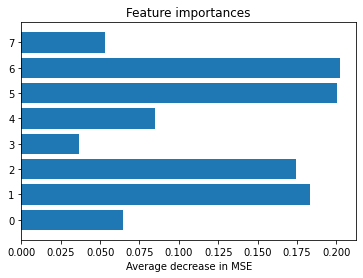

In [37]:
short_feature_list = ['SOS_1', 'SRS_1', 'NRtg_1', '538rating_1', 'SOS_2', 'SRS_2', 'NRtg_2', '538rating_2', 'Score_dif']
long_feature_list = ['W-L%_1', 'Pace_1', 'FTr_1', '3PAr_1', 'TS%_1', 'TRB%_1',
       'AST%_1', 'STL%_1', 'BLK%_1', 'eFG%_1', 'TOV%_1', 'ORB%_1', 'FT/FGA_1', 'MOV_1', 
       'SOS_1', 'SRS_1', 'NRtg_1', 
       'W-L%_2', 'Pace_2', 'FTr_2', '3PAr_2', 'TS%_2', 'TRB%_2',
       'AST%_2', 'STL%_2', 'BLK%_2', 'eFG%_2', 'TOV%_2', 'ORB%_2', 'FT/FGA_2', 'MOV_2', 'SOS_2', 'SRS_2', 'NRtg_2', 'Score_dif']

test_set = test_set[short_feature_list]
model, X_test = model_creation(test_set, 8, 'xgb', [400, 600, 800, 1000, 1200], [2, 3, 4, 5, 6])

In [18]:
import pickle

with open('models/mens538_xgb.pkl','wb') as f:
    pickle.dump(model,f)

In [55]:
import pickle
import numpy as np
import math

with open('models/mens_xgb.pkl', 'rb') as f:
    mens_xgb = pickle.load(f)

with open('models/mens538_xgb.pkl', 'rb') as f:
    mens538_xgb = pickle.load(f)

def logistic(x, temp):
    return 1 / (1 + np.exp(-x/temp))

def chance538(x):
    return 1.0 / (1.0 + math.pow(10, -x*30.464/400))

In [82]:
X_test[20:30]

,SOS_1,SRS_1,NRtg_1,538rating_1,SOS_2,SRS_2,NRtg_2,538rating_2
233,11.99,21.400000,31.889999,89.040001,10.16,21.549999,30.990000,91.339996
238,7.79,19.280001,29.260000,89.260002,2.23,5.060000,8.210000,77.010002
248,2.62,15.560000,21.209999,85.739998,6.04,10.280000,14.980000,81.940002
349,-5.54,-0.260000,0.260000,74.300003,8.65,20.080000,29.590000,88.699997
364,8.87,17.010000,26.180000,86.320000,6.48,14.480000,21.990000,84.680000
188,8.74,12.850000,19.120001,81.480003,10.73,17.240000,25.030001,88.169998
269,8.86,13.520000,19.459999,83.410004,5.92,27.200001,37.560001,96.510002
388,7.01,11.870000,17.940001,82.099998,11.59,14.620000,21.150000,85.150002
359,-3.93,0.910000,2.270000,76.690002,8.36,19.299999,28.379999,89.830002
305,-6.37,6.270000,9.300000,77.040001,11.34,16.299999,24.070000,81.889999


In [91]:
x = 28
y = mens_xgb.predict([X_test[['SOS_1', 'SRS_1', 'NRtg_1', 'SOS_2', 'SRS_2', 'NRtg_2']].iloc[x]])[0]
print(logistic(y, 3))
print(logistic(y, 4.5))
print(logistic(y, 5))
y2 = X_test['538rating_1'].iloc[x] - X_test['538rating_2'].iloc[x]
chance538(y2)

0.006685451888458446
0.03442051350408106
0.047395697778918396


0.09076792253967504

In [53]:
print(logistic(8.17, 4.5))
chance538()

0.8600319738483718

In [158]:
from tqdm import tqdm

url = 'https://www.sports-reference.com/cbb/seasons/men/2023-ratings.html'
season = 2023

def logistic(x, temp):
    return 1 / (1 + np.exp(-x/temp))

ids = []
probs = []
for id in tqdm(range(1101, 1478)):
    for opp_id in range(id+1, 1478):
        id_str = str(season) + '_' + str(id) + '_' + str(opp_id)
        ids.append(id_str)
        try:
            school_name = teams[teams['TeamID']==id]['crefName'].iloc[0]
            if school_name != 'unknown':
                team_df = df[df['School']==school_name]
                team_df = list(team_df[['SOS', 'SRS', 'NRtg']].iloc[0])
            opp_school_name = teams[teams['TeamID']==opp_id]['crefName'].iloc[0]
            if opp_school_name != 'unknown':
                opp_team_df = df[df['School']==opp_school_name]
                opp_team_df = list(opp_team_df[['SOS', 'SRS', 'NRtg']].iloc[0])
            l = team_df + opp_team_df
            l = list(map(float, l))
            prob = round(logistic(mens_xgb.predict([l])[0], 5), 4)
        except:
            prob = 0.0000
        probs.append(prob)

submission = pd.DataFrame()
submission.insert(0, 'ID', ids, True)
submission.insert(1, 'Pred', probs, True)
submission.to_csv('submission.csv', index=False)


## Women

In [213]:
import pandas as pd
from tqdm import tqdm

# Create test set (NCAA games) - location is not always neutral?
df_list = []
teams = pd.read_csv('data/women_teams.csv')
seasons = [2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022]
for season in tqdm(seasons):
    url = f"https://www.sports-reference.com/cbb/seasons/women/{season}-ratings.html"
    df = pd.read_html(url)[0]
    df.columns = df.columns.droplevel()
    df = df.dropna(axis=1,how='all')
    df = df[df['Rk'].notna()]
    df = df.drop_duplicates(keep=False)
    df['season'] = season
    df = df.merge(teams, left_on='School', right_on='crefName', how='inner')
    df_list.append(df)

season_data = pd.concat(df_list)
season_data.to_csv('data/women_season_stats.csv', index=False)

tourney_info = pd.read_csv('data/WNCAATourneyCompactResults.csv')

test_data = pd.merge(season_data, tourney_info, left_on=['season', 'TeamID'], right_on=['Season', 'WTeamID'], how='inner').merge(season_data, left_on=['LTeamID', 'season'], right_on=['TeamID', 'season'], how='inner', suffixes=('_1', '_2'))
test_data['Score_dif'] = test_data['WScore'] - test_data['LScore']
test_data = test_data.drop(['crefName_1', 'crefName_2', 'WLoc', 'WScore', 'LScore', 'TeamName_1', 'TeamName_2', 'WTeamID', 'LTeamID', 'TeamID_1', 'TeamID_2', 'Rk_1', 'Rk_2', 'School_1', 'DayNum', 'NumOT', 'School_2', 'Conf_1', 'Conf_2', 'ORtg_1', 'ORtg_2', 'DRtg_1', 'DRtg_2', 'OSRS_1', 'OSRS_2', 'DSRS_1', 'DSRS_2', 'Season'], axis=1)

100%|██████████| 12/12 [00:03<00:00,  3.70it/s]


In [214]:
# Give me the reverse
test_data_rev = pd.DataFrame()
test_data_rev.insert(0, 'W_1', test_data['W_2'], True)
test_data_rev.insert(1, 'L_1', test_data['L_2'], True)
test_data_rev.insert(2, 'Pts_1', test_data['Pts_2'], True)
test_data_rev.insert(3, 'Opp_1', test_data['Opp_2'], True)
test_data_rev.insert(4, 'MOV_1', test_data['MOV_2'], True)
test_data_rev.insert(5, 'SOS_1', test_data['SOS_2'], True)
test_data_rev.insert(6, 'SRS_1', test_data['SRS_2'], True)
test_data_rev.insert(7, 'NRtg_1', test_data['NRtg_2'], True)
test_data_rev.insert(8, 'season', test_data['season'], True)
test_data_rev.insert(9, 'W_2', test_data['W_1'], True)
test_data_rev.insert(10, 'L_2', test_data['L_1'], True)
test_data_rev.insert(11, 'Pts_2', test_data['Pts_1'], True)
test_data_rev.insert(12, 'Opp_2', test_data['Opp_1'], True)
test_data_rev.insert(13, 'MOV_2', test_data['MOV_1'], True)
test_data_rev.insert(14, 'SOS_2', test_data['SOS_1'], True)
test_data_rev.insert(15, 'SRS_2', test_data['SRS_1'], True)
test_data_rev.insert(16, 'NRtg_2', test_data['NRtg_1'], True)
test_data_rev.insert(17, 'Score_dif', -test_data['Score_dif'], True)

In [215]:
# Concatenate and fix types
test_set = pd.concat([test_data, test_data_rev])
test_set['W_1'] = pd.to_numeric(test_set['W_1'], downcast='integer')
test_set['L_1'] = pd.to_numeric(test_set['L_1'], downcast='integer')
test_set['W_2'] = pd.to_numeric(test_set['W_2'], downcast='integer')
test_set['L_2'] = pd.to_numeric(test_set['L_2'], downcast='integer')
test_set['Pts_1'] = pd.to_numeric(test_set['Pts_1'], downcast='float')
test_set['Pts_2'] = pd.to_numeric(test_set['Pts_2'], downcast='float')
test_set['Opp_1'] = pd.to_numeric(test_set['Opp_1'], downcast='float')
test_set['MOV_1'] = pd.to_numeric(test_set['MOV_1'], downcast='float')
test_set['MOV_2'] = pd.to_numeric(test_set['MOV_2'], downcast='float')
test_set['Opp_2'] = pd.to_numeric(test_set['Opp_2'], downcast='float')
test_set['SOS_1'] = pd.to_numeric(test_set['SOS_1'], downcast='float')
test_set['SOS_2'] = pd.to_numeric(test_set['SOS_2'], downcast='float')
test_set['SRS_1'] = pd.to_numeric(test_set['SRS_1'], downcast='float')
test_set['SRS_2'] = pd.to_numeric(test_set['SRS_2'], downcast='float')
test_set['NRtg_1'] = pd.to_numeric(test_set['NRtg_1'], downcast='float')
test_set['NRtg_2'] = pd.to_numeric(test_set['NRtg_2'], downcast='float')
test_set['Score_dif'] = pd.to_numeric(test_set['Score_dif'], downcast='integer')
test_set = test_set.drop('season', axis=1)

test_set = test_set.dropna()
test_set.to_csv('data/wtest_set.csv', index=False)
test_set.shape

(1360, 17)

{'n_estimators': 600, 'max_depth': 2, 'learning_rate': 0.01}
Mean Absolute Error = 8.326630592346191
Mean Squared Error = 106.3645248413086
Root Mean Squared Error = 10.31331783866417
r2 = 0.7689337053015923

Mean Absolute Error = 9.464577674865723
Mean Squared Error = 138.593994140625
Root Mean Squared Error = 11.772595046998983
r2 = 0.714727318566041
RMSE scores: [12.4061553  13.91364796 11.8061138  13.45718546 13.40253331]
Mean RMSE: 12.997127165909834
Index(['SOS_1', 'SRS_1', 'NRtg_1', 'SOS_2', 'SRS_2', 'NRtg_2', 'Score_dif'], dtype='object')


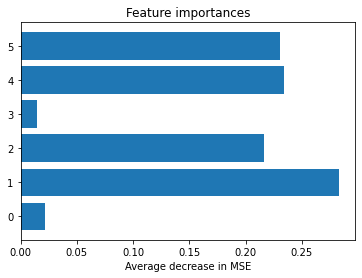

In [238]:
test_set = test_set[['SOS_1', 'SRS_1', 'NRtg_1', 'SOS_2', 'SRS_2', 'NRtg_2', 'Score_dif']]
model, X_test = model_creation(test_set, 6, 'xgb', [600, 800, 1000, 1200], [2, 3, 4, 5])

In [227]:
import pickle

with open('models/women_xgb.pkl','wb') as f:
    pickle.dump(model,f)

In [228]:
import pickle
 
with open('models/women_rf.pkl', 'rb') as f:
    women_rf = pickle.load(f)

with open('models/women_xgb.pkl', 'rb') as f:
    women_xgb = pickle.load(f)

In [229]:
X_test[10:20]

,SOS_1,SRS_1,NRtg_1,SOS_2,SRS_2,NRtg_2
522,2.48,10.800000,14.780000,13.91,27.760000,41.970001
86,17.25,31.110001,48.160000,13.80,19.070000,30.129999
102,10.02,15.500000,26.209999,11.98,20.580000,32.279999
453,9.21,18.950001,27.719999,14.68,33.520000,49.570000
586,7.67,17.670000,29.150000,12.71,27.790001,42.250000
246,11.02,51.660000,76.410004,-6.92,-8.390000,-6.110000
105,8.92,19.170000,32.290001,10.84,17.420000,29.360001
320,14.88,29.830000,45.869999,-4.27,-2.690000,3.070000
441,15.03,34.720001,51.680000,13.12,37.860001,56.320000
505,10.85,38.820000,57.540001,12.22,14.340000,25.500000


In [235]:
x = 10
print(women_rf.predict([X_test.iloc[x]]))
women_xgb.predict([X_test.iloc[x]])

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


[-14.70110106]


array([-15.84457], dtype=float32)

## Submission

In [1]:
import pickle

with open('models/women_xgb.pkl', 'rb') as f:
    women_xgb = pickle.load(f)

with open('models/mens_xgb.pkl', 'rb') as f:
    mens_xgb = pickle.load(f)

In [2]:
import numpy as np
import math

def logistic(x, temp):
    return 1 / (1 + np.exp(-x/temp))

def n(x):
    return 1.0 / (1.0 + math.pow(10, -30.464*x/400))

print(logistic(10, 3.5))
n(10)

0.9456867338673594


0.8524124323750123

In [12]:
from tqdm import tqdm
import pandas as pd

temp = 5  # Adjust the sensitivity of the sigmoid function that creates the probabilities

# Find the current team ids (they play in the 2023 season)
season = 2023
teams = pd.read_csv('data/mens_teams.csv')
cur_mteam_ids = teams[teams['LastD1Season']==season]['TeamID'].to_list()
df = pd.read_csv('data/WRegularSeasonCompactResults.csv')
df = df[df['Season']==season]
cur_wteam_ids = list(set(df['WTeamID'].to_list() + df['LTeamID'].to_list()))

# Men Part
url = 'https://www.sports-reference.com/cbb/seasons/men/2023-ratings.html'
df = pd.read_html(url)[0]
df.columns = df.columns.droplevel()
df = df.dropna(axis=1,how='all')
df = df[df['Rk'].notna()]
df = df.drop_duplicates(keep=False)

def logistic(x, temp):
    return 1 / (1 + np.exp(-x/temp))

ids = []
probs = []
for i, id in tqdm(enumerate(cur_mteam_ids)):
    for opp_id in cur_mteam_ids[(i+1):]:
        id_str = str(season) + '_' + str(id) + '_' + str(opp_id)
        ids.append(id_str)
        try:
            school_name = teams[teams['TeamID']==id]['crefName'].iloc[0]
            team_df = df[df['School']==school_name]
            team_df = list(team_df[['SOS', 'SRS', 'NRtg']].iloc[0])
            opp_school_name = teams[teams['TeamID']==opp_id]['crefName'].iloc[0]
            opp_team_df = df[df['School']==opp_school_name]
            opp_team_df = list(opp_team_df[['SOS', 'SRS', 'NRtg']].iloc[0])
            l = team_df + opp_team_df
            l = list(map(float, l))
            prob = round(logistic(mens_xgb.predict([l])[0], temp), 4)
        except:
            prob = 0.0000
        probs.append(prob)

msubmission = pd.DataFrame()
msubmission.insert(0, 'ID', ids, True)
msubmission.insert(1, 'Pred', probs, True)


# Women Part
url = 'https://www.sports-reference.com/cbb/seasons/women/2023-ratings.html'
season = 2023
teams = pd.read_csv('data/women_teams.csv')

df = pd.read_html(url)[0]
df.columns = df.columns.droplevel()
df = df.dropna(axis=1,how='all')
df = df[df['Rk'].notna()]
df = df.drop_duplicates(keep=False)

def logistic(x, temp):
    return 1 / (1 + np.exp(-x/temp))

ids = []
probs = []
for i, id in tqdm(enumerate(cur_wteam_ids)):
    for opp_id in cur_wteam_ids[(i+1):]:
        id_str = str(season) + '_' + str(id) + '_' + str(opp_id)
        ids.append(id_str)
        try:
            school_name = teams[teams['TeamID']==id]['crefName'].iloc[0]
            team_df = df[df['School']==school_name]
            team_df = list(team_df[['SOS', 'SRS', 'NRtg']].iloc[0])
            opp_school_name = teams[teams['TeamID']==opp_id]['crefName'].iloc[0]
            opp_team_df = df[df['School']==opp_school_name]
            opp_team_df = list(opp_team_df[['SOS', 'SRS', 'NRtg']].iloc[0])
            l = team_df + opp_team_df
            l = list(map(float, l))
            prob = round(logistic(women_xgb.predict([l])[0], temp), 4)
        except:
            prob = 0.0000
        probs.append(prob)

wsubmission = pd.DataFrame()
wsubmission.insert(0, 'ID', ids, True)
wsubmission.insert(1, 'Pred', probs, True)

# Concatenate men and women
submission = pd.concat([msubmission, wsubmission])

363it [05:27,  1.11it/s]
361it [05:44,  1.05it/s]


In [13]:
submission.to_csv('submissions/submission50.csv', index=False)